# Draw minimum volume level set in 2D

In this example, we compute the minimum volume level set of a bivariate distribution.

In [1]:
import openturns as ot

In [2]:
# Create a gaussian
corr = ot.CorrelationMatrix(2)
corr[0, 1] = 0.2
copula = ot.NormalCopula(corr)
x1 = ot.Normal(-1., 1)
x2 = ot.Normal(2, 1)
x_funk = ot.ComposedDistribution([x1, x2], copula)

# Create a second gaussian
x1 = ot.Normal(1.,1)
x2 = ot.Normal(-2,1)
x_punk = ot.ComposedDistribution([x1, x2], copula)

# Mix the distributions
mixture = ot.Mixture([x_funk, x_punk], [0.5,1.])

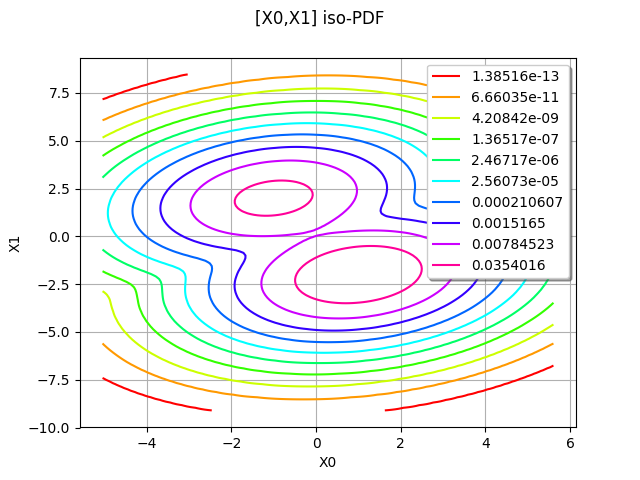

In [3]:
mixture.drawPDF()

For a multivariate distribution (with dimension greater than 1), the `computeMinimumVolumeLevelSetWithThreshold` uses Monte-Carlo sampling. 

In [4]:
ot.ResourceMap.SetAsUnsignedInteger("Distribution-MinimumVolumeLevelSetSamplingSize",1000)

We want to compute the minimum volume LevelSet which contains `alpha`=90% of the distribution. The `threshold` is the value of the PDF corresponding the `alpha`-probability: the points contained in the LevelSet have a PDF value lower or equal to this threshold.

In [5]:
alpha = 0.9
levelSet, threshold = mixture.computeMinimumVolumeLevelSetWithThreshold(alpha)
threshold

0.008629500721285885

In [6]:
def drawLevelSetContour2D(distribution, numberOfPointsInXAxis, alpha, threshold, sampleSize= 500):
    '''
    Compute the minimum volume LevelSet of measure equal to alpha and get the 
    corresponding density value (named threshold).
    Generate a sample of the distribution and draw it. 
    Draw a contour plot for the distribution, where the PDF is equal to threshold. 
    '''
    sample = distribution.getSample(sampleSize)
    X1min = sample[:, 0].getMin()[0]
    X1max = sample[:, 0].getMax()[0]
    X2min = sample[:, 1].getMin()[0]
    X2max = sample[:, 1].getMax()[0]
    xx = ot.Box([numberOfPointsInXAxis],
                ot.Interval([X1min], [X1max])).generate()
    yy = ot.Box([numberOfPointsInXAxis],
                ot.Interval([X2min], [X2max])).generate()
    xy = ot.Box([numberOfPointsInXAxis, numberOfPointsInXAxis],
                ot.Interval([X1min, X2min], [X1max, X2max])).generate()
    data = distribution.computePDF(xy)
    graph = ot.Graph('', 'X1', 'X2', True, 'topright')
    labels = ["%.2f%%" % (100*alpha)]
    contour = ot.Contour(xx, yy, data, ot.Point([threshold]), ot.Description(labels))
    contour.setColor('black')
    graph.setTitle("%.2f%% of the distribution, sample size = %d" % (100*alpha,sampleSize))
    graph.add(contour)
    cloud = ot.Cloud(sample)
    graph.add(cloud)
    return graph

The following plot shows that 90% of the sample is contained in the LevelSet.

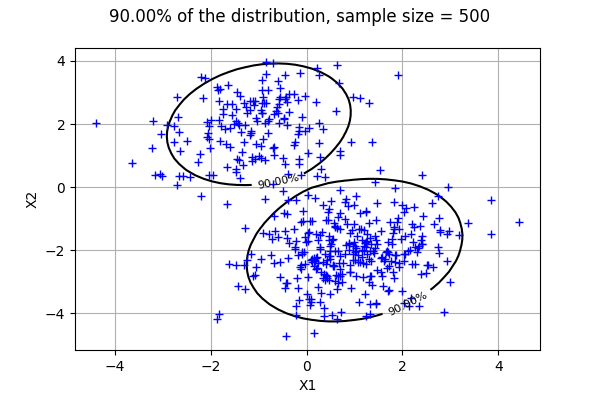

In [7]:
numberOfPointsInXAxis = 50
drawLevelSetContour2D(mixture, numberOfPointsInXAxis, alpha, threshold)